/tmp/ipython-input-2253414690.py:10: FutureWarning: YF.download() has changed argument auto_adjust default to True
  df = yf.download(ticker, start=start, end=end)
[*********************100%***********************]  1 of 1 completed



--- Running Baseline Model (Linear Regression) ---
Baseline Linear Regression RMSE: 14.83


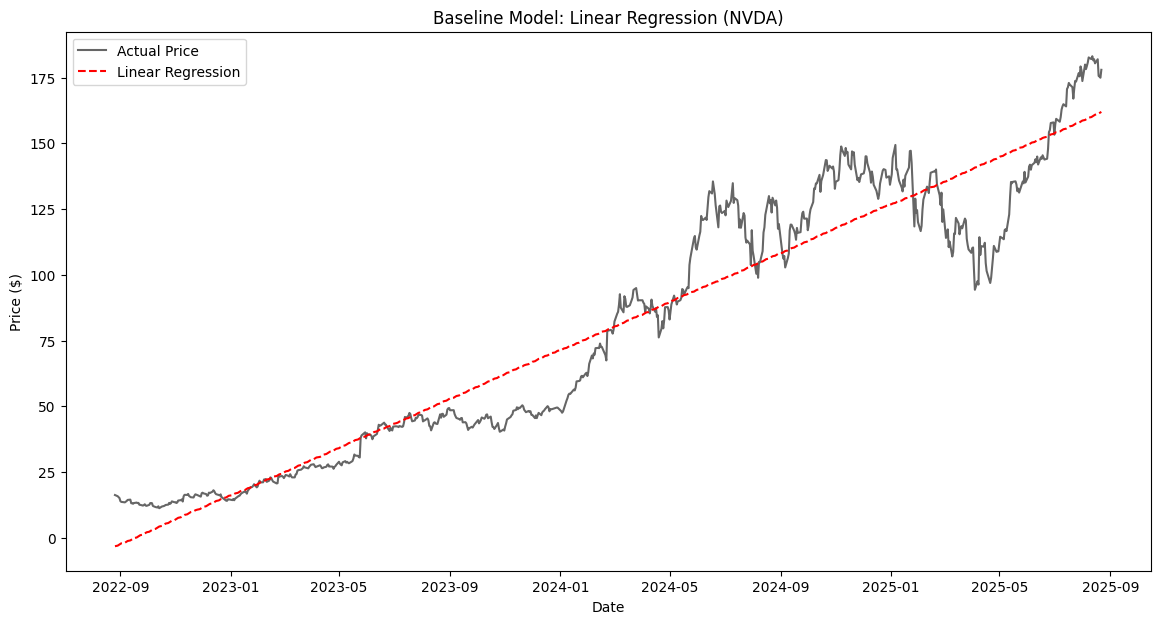

In [1]:
import yfinance as yf
import pandas as pd
import datetime as dt
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

def fetch_data(ticker, start, end):
    df = yf.download(ticker, start=start, end=end)

    if len(df) == 0:
        raise ValueError("No data found. Check your internet connection or ticker symbol.")

    if not isinstance(df.index, pd.DatetimeIndex):
        df.index = pd.to_datetime(df.index)

    if isinstance(df.columns, pd.MultiIndex):
        df = df['Close']
    else:
        df = df[['Close']]

    df = df.dropna()
    return df

def run_baseline_model(df):
    """
    Fits a simple Linear Regression line to the data.
    """
    print("\n--- Running Baseline Model (Linear Regression) ---")

    df = df.copy()
    df['Time_Index'] = np.arange(len(df))

    X = df[['Time_Index']]
    y = df['Close']

    reg_model = LinearRegression()
    reg_model.fit(X, y)

    df['Baseline_Prediction'] = reg_model.predict(X)

    rmse = np.sqrt(mean_squared_error(y, df['Baseline_Prediction']))
    print(f"Baseline Linear Regression RMSE: {rmse:.2f}")

    return df

if __name__ == "__main__":
    end = dt.datetime(2025, 8, 25)
    start = end - dt.timedelta(days=3*365)
    TICKER = "NVDA"

    stock_df = fetch_data(TICKER, start, end)

    if TICKER in stock_df.columns and len(stock_df.columns) == 1:
        stock_df.rename(columns={TICKER: 'Close'}, inplace=True)
    stock_df = run_baseline_model(stock_df)

    plt.figure(figsize=(14, 7))
    plt.plot(stock_df.index, stock_df['Close'], label='Actual Price', color='black', alpha=0.6)
    plt.plot(stock_df.index, stock_df['Baseline_Prediction'], label='Linear Regression', color='red', linestyle='--')

    plt.title(f'Baseline Model: Linear Regression ({TICKER})')
    plt.xlabel('Date')
    plt.ylabel('Price ($)')
    plt.legend()
    plt.show()